# PROYECTO FINAL SEÑALES III

---

**Juan Daniel Gonzalez puerta**

**Julian Andres Zapata Díaz**

**Santiago Sepulveda**

*Universidad de Antioquia*

2020

# CALIDAD DE AIRE EN LA CIUDAD DE MEDELLIN

# **PM2.5 partículas en el aire**


La calidad del aire en Medellín se ha convertido en los últimos10 años, uno de los aspectos más relevantes para las autoridades locales, con la implementación de un Plan de Descontaminación a mediano, largo y corto plazo para el manejo de episodios críticos del Valle de Aburrá, orientado a lograr cambios estructurales para la solución permanente de la contaminación atmosférica con todos los actores involucrados. 
Si bien la contaminación de aire está asociada con los porcentajes de emisión anual y 24 horas de contaminantes como óxidos de azufre (SOx), óxidos de  nitrógeno (NOx), ozono (O3), gas carbónico (CO2), material particulado respirables (PM10), material particulado de fracción fina (PM2.5) generados a nivel industrial y por el parque automotor para este trabajo se hara enfocado en PM2.5.

Las fuentes comunes de PM2.5 son:

*  humo de los incendios
*  humo de calentadores de madera
*  escapes de automóviles y camiones
*  Industria.


[PM2.5 particles in the air](https://repository.unimilitar.edu.co/bitstream/handle/10654/17019/G%C3%B3mezCombaCieloAmparo2017.pdf?sequence=1&isAllowed=y)


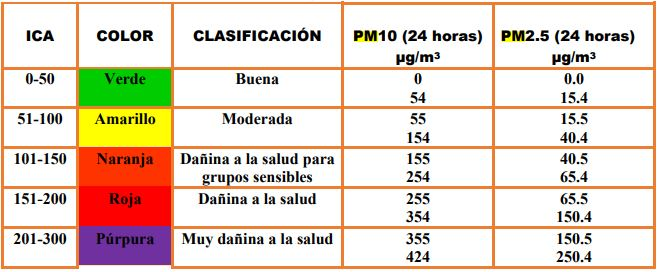

In [1]:
#Importamos librerias a usar
from google.colab import files

import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd

import json
from pandas.io.json import json_normalize

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

%matplotlib inline



In [2]:
uploaded = files.upload() #comando para subir archivo

with open('Datos_SIATA_Aire_pm25_2018-2019.json') as f: #abrir archivo 
    dataset = json.load(f) #cargar base de datos

Saving Datos_SIATA_Aire_pm25_2018-2019.json to Datos_SIATA_Aire_pm25_2018-2019 (5).json


In [3]:
X = json_normalize(dataset,'datos',['nombre','latitud','longitud']) 
dataset = json_normalize(dataset) #normalizamos la base de datos
dataset.head(21) #mostramos la base de datos

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,latitud,codigoSerial,datos,nombre,nombreCorto,longitud
0,6.379038,3,"[{'variableConsulta': 'pm25', 'fecha': '2018-0...",Girardota - S.O.S Aburrá Norte,GIR-SOSN,-75.450913
1,6.252561,12,"[{'variableConsulta': 'pm25', 'fecha': '2018-0...",Estación Tráfico Centro,CEN-TRAF,-75.569580
2,6.263370,25,"[{'variableConsulta': 'pm25', 'fecha': '2018-0...","Medellín, centro occidente - Universidad Naci...",MED-UNNV,-75.577004
3,6.185667,28,"[{'variableConsulta': 'pm25', 'fecha': '2018-0...",Itagüí - Casa de Justicia Itagüí,ITA-CJUS,-75.597206
4,6.099081,31,"[{'variableConsulta': 'pm25', 'fecha': '2018-0...",Caldas - Corporacion Universitaria Lasallista,CAL-LASA,-75.638626
5,6.168497,38,"[{'variableConsulta': 'pm25', 'fecha': '2018-0...",Itagüí - I.E. Concejo Municipal de Itagüí,ITA-CONC,-75.644356
6,6.182542,44,"[{'variableConsulta': 'pm25', 'fecha': '2018-0...","Medellín, El Poblado - Tanques La Ye EPM",MED-LAYE,-75.550636
7,6.152313,48,"[{'variableConsulta': 'pm25', 'fecha': '2018-0...",Estación Tráfico Sur,SUR-TRAF,-75.627487
8,6.093078,69,"[{'variableConsulta': 'pm25', 'fecha': '2018-0...",Caldas - E U Joaquín Aristizabal,CAL-JOAR,-75.637764
9,6.155531,78,"[{'variableConsulta': 'pm25', 'fecha': '2018-0...",La Estrella - Hospital,EST-HOSP,-75.644173


**Oservacion de la base de la base de datos:**

La base de datos cuenta 183981 datos recogidos a lo largo de un año y tiene 6 tipos de datos diferentes los cuales son:

*  longitud y latitud de las estaciones ubicadas en la region del area metropolitana.

*  codigo serial de cada estacion, aunque este codigo no representa nada importante y difieren de los codigos reales que aparece en la pagina del siata. se concluye que es un codigo para identificar cada estacion en la base de datos.

*  datos de las mediciones realizadas por la estacion, la variable consultada que en este caso es PM2.5, el valor medido y la fecha y hora de su analisis.

*  Nombre de la estacion y un nombre corto que la identidica.

Los datos se registraron desde agosto 28 del 2018 a las 04:00 am hasta agosto 28 del 2019 04:00 am con un periodo de una hora, por lo tanto 365 días por 24 horas por 21 estaciones tendriamos un total de 183.960 muestras.

In [4]:
# Desempaquetamos la Columna de datos  (unpack the Column datos)

X=X.drop(['variableConsulta', 'calidad'], axis=1)   # elimino columna que dice PM2.5 y la de calidad que parece que no tiene sentido.
X = X.values

# Consideraciones a tener en cuenta antes del analsis. 

Como se midio la cantidad de materia particulada en el aire de medellin no tiene sentido que existan valores negativos, por lo tanto se asume como un error de sensado o que no hubo sensado por algún motivo, por lo cual se cambiaran por un valor igual a 0.0.

Para conocer el valor maximo que estos sensores pueden haber detectado nos apoyaremos en la pagina del area metropolitana donde se almacenan todos los resumenes de la calidad de aire en medellin y los municipios del valle de aburra.

[Resumenes-calidad-del-aire](https://www.metropol.gov.co/ambiental/calidad-del-aire/Documents/Forms/AllItems.aspx?RootFolder=%2Fambiental%2Fcalidad%2Ddel%2Daire%2FDocuments%2FResumenes%2Dcalidad%2Ddel%2Daire&FolderCTID=0x0120008162DB5A0DE33D4FBDC4412520B8FAF8&View=%7B364E08F2%2DD1DE%2D4398%2DA5B2%2D6C0B0A6DE714%7D#InplviewHash364e08f2-d1de-4398-a5b2-6c0b0a6de714=RootFolder%3D%252fambiental%252fcalidad%252ddel%252daire%252fDocuments%252fResumenes%252dcalidad%252ddel%252daire)

Se reviso cuidadosamente cada uno de los resumenes (12) y ademas el promedio anual entre 2018 a 2019 y se encontro que los valores de PM2.5 nunca superaban los 50ug/m^ en promedio mensualmente, por esto es que se decidio que para valores mayores de 60.0 se igualarian a al promedio que tuvo ese día el sensor.  

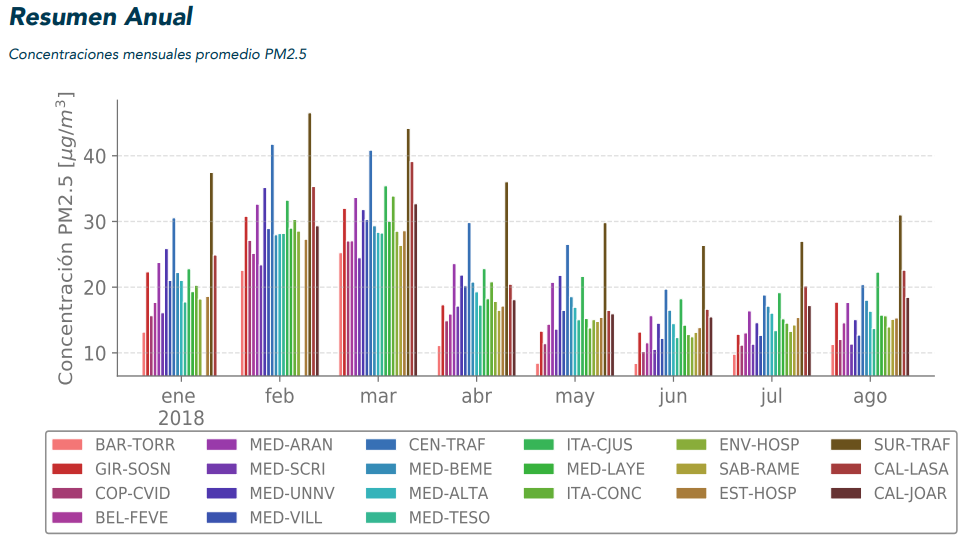


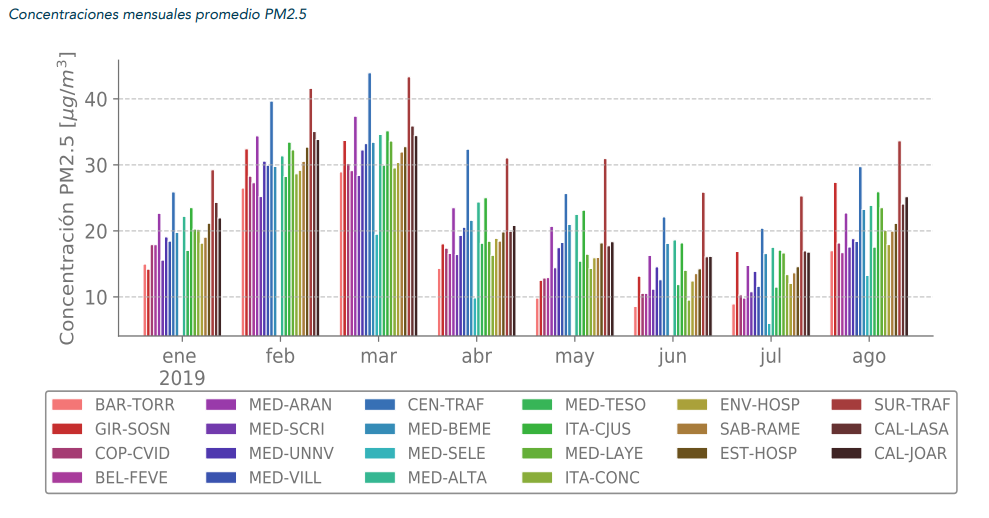

In [5]:
#ciclo que recorre toda la base de datos
for i in range(183981):
  if (X[i,1:2] < 0.0): #si el valor es negativo 
    X[i,1:2] = 0.0 # asignar el valor 0.0
  if (X[i,1:2] > 60.0): #si el valor es mayor que 60.0
    X[i,1:2] = 160.0 #asignar 160.0 (como marca)

In [6]:
# ciclo que recorre todos los días de las 21 estaciones

for i in range (7665):
  aux=[] #variable auxiliar
  for h in range(24): #ciclo que recorre las 24 horas
    aux.append(X[24*i+h,1:2]) # agregar las 24 muestrar a la variable auxiliar

  while 160.0 in aux: #mientras 160.0 este contenito en la variable auxiliar
    pos=aux.index(160.0) #guardo la posicion
    aux[pos]=0 # convierto el valor a 0
    X[pos+24*i,1:2] = np.mean(aux) # se reemplaza con el valor promedio del día

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Con los datos medidos corregidos y listos para el analisis procedemos a graficar y revisar de manera general el comportamiento de la variable a los largo de un día o mes en una estación. 

para esto es utíl separar los datos por estacion, a cada estacion le corresponde un total de 8.760 muestras: 365 días X 24 horas.

In [7]:
# Separacion de los datos por estacion de medicion.
# Atencion los primeros 720 datos DE CADA itervalo corresponde al primer mes de cada estacion.

Xa = X[0:8761,:]          # 'Girardota - S.O.S Aburrá Norte'
Xb = X[8761:17522,:]      # 'Estación Tráfico Centro'
Xc = X[17522:26283,:]     # 'Medellín,  centro occidente - Universidad Nacional, sede El Volador'
Xd = X[26283:35044,:]     # 'Itagüí - Casa de Justicia Itagüí'
Xe = X[35044:43805,:]     # 'Caldas - Corporacion Universitaria Lasallista'
Xf = X[43805:52566,:]     # 'Itagüí - I.E. Concejo Municipal de Itagüí'
Xg = X[52566:61327,:]     # 'Medellín, El Poblado - Tanques La Ye EPM'
Xh = X[61327:70088,:]     # 'Estación Tráfico Sur'
Xi = X[70088:78849,:]     # 'Caldas - E U Joaquín Aristizabal'
Xj = X[78849:87610,:]     # 'La Estrella - Hospital'
Xk = X[87610:96371,:]     # 'Medellín, Altavista - I.E. Pedro Octavio Amado'
Xl = X[96371:105132,:]    # 'Medellín, Villahermosa - Planta de producción de agua potable EPM'
Xm = X[105132:113893,:]   # 'Barbosa - Torre Social'
Xn = X[113893:122654,:]   # 'Copacabana - Ciudadela Educativa La Vida'
Xo = X[122654:131415,:]   # 'Medellin, Belén - I.E Pedro Justo Berrio'
Xp = X[131415:140176,:]   # 'Medellín, El Poblado - I.E INEM sede Santa Catalina'
Xq = X[140176:148937,:]   # 'Medellín, San Cristobal - Parque Biblioteca Fernando Botero'
Xr = X[148937:157698,:]   # 'Medellín, Aranjuez - I.E Ciro Mendia'
Xs = X[157698:166459,:]   # 'Bello - I.E. Fernando Vélez'
Xt = X[166459:175220,:]   # 'Envigado - E.S.E. Santa Gertrudis'
Xu = X[175220:183981,:]   # 'Sabaneta - I.E. Rafael J. Mejía'

* Definimos una funcion que nos permita de manera interativa graficar el día o mes de una estacion en particualar.

In [8]:
# Funcion para dibujar la senal de DOS formas diferentes enviandole el mes, el dia y la estacion.

def plot_mes (Y, a, b):
  #a= float(a)
  b= int(b)
  ver = Y[720*a:720+720*a, :]
  c = 720  
  if (b > 0):
    ver = ver[24*b:24+24*b, :]
    c = 24

  plt.figure(figsize=(20,10))
  t=np.linspace(0, c, c)
  plt.plot(t,ver[:,1])
  plt.title('Material Particulado PM 2.5', pad = 20, fontdict={'fontsize':20, 'color': '#4873ab'})
  plt.xlabel('Horas')
  plt.ylabel('PM 2.5')
  plt.minorticks_on()
  plt.grid(b=True, which='minor')
  plt.grid()
  plt.show()

  import plotly.express as px

  ver = pd.DataFrame(ver)
  ver.columns =['Fecha', 'Q(Aire)', 'Sensor', 'latitud', 'longitud']
  fig = px.line(ver, x = 'Fecha', y = 'Q(Aire)')
  
  fig.show()
  

* Seleccionar primero la esatcion, luego el mes y por ultimo el día.

Nota: si se desea revisar un mes completo debe seleccionar en dia_selec cero (0).

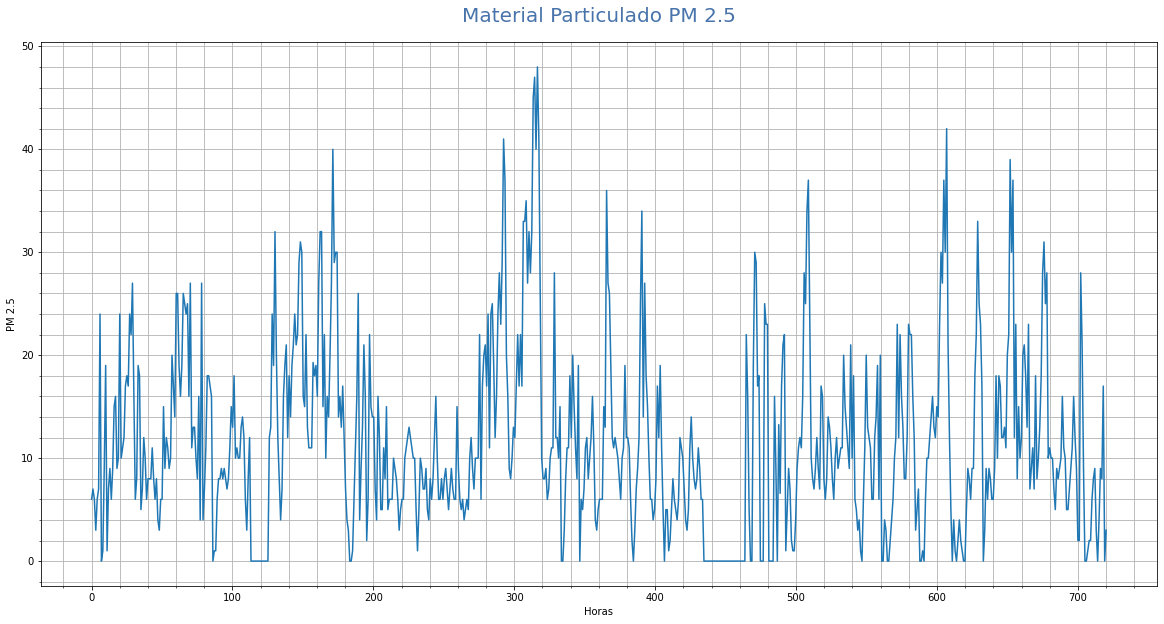

In [13]:
# Si en dia_selec se escoge 0 (ZERO) se plotea todo el mes.

meses_dic = {'Septiembre(2018)' : 0, 'Octubre(2018)' : 1, 'Noviembre(2018)' : 2, 'Diciembre(2018)' : 3, 'Enero(2019)' : 4, 'Febrero(2019)' : 5, 'Marzo(2019)' : 6, 
         'Abril(2019)' : 7, 'Mayo(2019)' : 8, 'junio(2019)' : 9, 'Julio(2019)' : 10, 'Agosto(2019)' : 11}
estacion_dic = {'Girardota - S.O.S Aburra Norte' : Xa, 'Estacion Trafico Centro' : Xb, 'Medellin,  centro occidente - Universidad Nacional, sede El Volador' : Xc,
             'Itagui - Casa de Justicia Itagui' : Xd, 'Caldas - Corporacion Universitaria Lasallista' : Xe, 'Itagui - I.E. Concejo Municipal de Itagui' : Xf,
             'Medellin, El Poblado - Tanques La Ye EPM' : Xg, 'Estacion Trafico Sur' : Xh, 'Caldas - E U Joaquin Aristizabal' : Xi,
             'La Estrella - Hospital' : Xj, 'Medellin, Altavista - I.E. Pedro Octavio Amado' : Xk, 'Medellin, Villahermosa - Planta de produccion de agua potable EPM' : Xl,
             'Barbosa - Torre Social' : Xm, 'Copacabana - Ciudadela Educativa La Vida' : Xn, 'Medellin, Belen - I.E Pedro Justo Berrio' : Xo, 
             'Medellin, El Poblado - I.E INEM sede Santa Catalina' : Xp, 'Medellin, San Cristobal - Parque Biblioteca Fernando Botero' : Xq,
             'Medellin, Aranjuez - I.E Ciro Mendia' : Xr, 'Bello - I.E. Fernando Velez' : Xs, 'Envigado - E.S.E. Santa Gertrudis' : Xt, 
             'Sabaneta - I.E. Rafael J. Mejia' : Xu}

estacion_selec = 'Girardota - S.O.S Aburra Norte'  # @param ['Girardota - S.O.S Aburra Norte', 'Estacion Trafico Centro', 'Medellin,  centro occidente - Universidad Nacional, sede El Volador', 'Itagui - Casa de Justicia Itagui', 'Caldas - Corporacion Universitaria Lasallista', 'Itagui - I.E. Concejo Municipal de Itagui', 'Medellin, El Poblado - Tanques La Ye EPM', 'Estacion Trafico Sur', 'Caldas - E U Joaquin Aristizabal', 'La Estrella - Hospital', 'Medellin, Altavista - I.E. Pedro Octavio Amado', 'Medellin, Villahermosa - Planta de produccion de agua potable EPM', 'Barbosa - Torre Social', 'Copacabana - Ciudadela Educativa La Vida', 'Medellin, Belen - I.E Pedro Justo Berrio', 'Medellin, El Poblado - I.E INEM sede Santa Catalina', 'Medellin, San Cristobal - Parque Biblioteca Fernando Botero', 'Medellin, Aranjuez - I.E Ciro Mendia', 'Bello - I.E. Fernando Velez', 'Envigado - E.S.E. Santa Gertrudis', 'Sabaneta - I.E. Rafael J. Mejía']
mes_selec = 'Octubre(2018)'  # @param ['Septiembre(2018)', 'Octubre(2018)', 'Noviembre(2018)', 'Diciembre(2018)', 'Enero(2019)', 'Febrero(2019)', 'Marzo(2019)', 'Abril(2019)', 'Mayo(2019)', 'junio(2019)', 'Julio(2019)', 'Agosto(2019)']
dia_selec = "0"  # @param [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]


plot_mes((estacion_dic[estacion_selec]), meses_dic[mes_selec], dia_selec)



In [10]:
#######################################################################################################################

In [11]:
#######################################################################################################################################################

## Caracteristicas

*  Energia
*  Promedio
*  Desviacion estandar

In [15]:
# creo una lista con los nombre de las estaciones
nom_estaciones=['Girardota - S.O.S Aburra Norte', 'Estacion Trafico Centro', 'Medellin,  centro occidente - Universidad Nacional, sede El Volador',
             'Itagui - Casa de Justicia Itagui', 'Caldas - Corporacion Universitaria Lasallista', 'Itagui - I.E. Concejo Municipal de Itagui',
             'Medellin, El Poblado - Tanques La Ye EPM', 'Estacion Trafico Sur', 'Caldas - E U Joaquin Aristizabal',
             'La Estrella - Hospital', 'Medellin, Altavista - I.E. Pedro Octavio Amado', 'Medellin, Villahermosa - Planta de produccion de agua potable EPM',
             'Barbosa - Torre Social', 'Copacabana - Ciudadela Educativa La Vida', 'Medellin, Belen - I.E Pedro Justo Berrio', 
             'Medellin, El Poblado - I.E INEM sede Santa Catalina', 'Medellin, San Cristobal - Parque Biblioteca Fernando Botero',
             'Medellin, Aranjuez - I.E Ciro Mendia', 'Bello - I.E. Fernando Velez', 'Envigado - E.S.E. Santa Gertrudis', 
             'Sabaneta - I.E. Rafael J. Mejia']

X = pd.DataFrame(X)
X.columns =['Fecha', 'Q(Aire)', 'Sensor', 'latitud', 'longitud']

# extraigo los valores de las estaciones
Valores=X['Q(Aire)']

# paso los valores guardados en una seria a una lista
valor=Valores.tolist()

# separo los valores por estaciones
va = valor[0:8761]         # 'Girardota - S.O.S Aburrá Norte'
vb = valor[8761:17522]     # 'Estación Tráfico Centro'
vc = valor[17522:26283]     # 'Medellín,  centro occidente - Universidad Nacional, sede El Volador'
vd = valor[26283:35044]     # 'Itagüí - Casa de Justicia Itagüí'
ve = valor[35044:43805]     # 'Caldas - Corporacion Universitaria Lasallista'
vf = valor[43805:52566]     # 'Itagüí - I.E. Concejo Municipal de Itagüí'
vg = valor[52566:61327]     # 'Medellín, El Poblado - Tanques La Ye EPM'
vh = valor[61327:70088]     # 'Estación Tráfico Sur'
vi = valor[70088:78849]     # 'Caldas - E U Joaquín Aristizabal'
vj = valor[78849:87610]     # 'La Estrella - Hospital'
vk = valor[87610:96371]     # 'Medellín, Altavista - I.E. Pedro Octavio Amado'
vl = valor[96371:105132]    # 'Medellín, Villahermosa - Planta de producción de agua potable EPM'
vm = valor[105132:113893]   # 'Barbosa - Torre Social'
vn = valor[113893:122654]   # 'Copacabana - Ciudadela Educativa La Vida'
vo = valor[122654:131415]   # 'Medellin, Belén - I.E Pedro Justo Berrio'
vp = valor[131415:140176]   # 'Medellín, El Poblado - I.E INEM sede Santa Catalina'
vq = valor[140176:148937]   # 'Medellín, San Cristobal - Parque Biblioteca Fernando Botero'
vr = valor[148937:157698]   # 'Medellín, Aranjuez - I.E Ciro Mendia'
vs = valor[157698:166459]   # 'Bello - I.E. Fernando Vélez'
vt = valor[166459:175220]   # 'Envigado - E.S.E. Santa Gertrudis'
vu = valor[175220:183981]   # 'Sabaneta - I.E. Rafael J. Mejía'

Fechas = X['Fecha']

fecha = Fechas.to_list()

fa = fecha[0:8761]         # 'Girardota - S.O.S Aburrá Norte'
fb = fecha[8761:17522]     # 'Estación Tráfico Centro'
fc = fecha[17522:26283]     # 'Medellín,  centro occidente - Universidad Nacional, sede El Volador'
fd = fecha[26283:35044]     # 'Itagüí - Casa de Justicia Itagüí'
fe = fecha[35044:43805]     # 'Caldas - Corporacion Universitaria Lasallista'
ff = fecha[43805:52566]     # 'Itagüí - I.E. Concejo Municipal de Itagüí'
fg = fecha[52566:61327]     # 'Medellín, El Poblado - Tanques La Ye EPM'
fh = fecha[61327:70088]     # 'Estación Tráfico Sur'
fi = fecha[70088:78849]     # 'Caldas - E U Joaquín Aristizabal'
fj = fecha[78849:87610]     # 'La Estrella - Hospital'
fk = fecha[87610:96371]     # 'Medellín, Altavista - I.E. Pedro Octavio Amado'
fl = fecha[96371:105132]    # 'Medellín, Villahermosa - Planta de producción de agua potable EPM'
fm = fecha[105132:113893]   # 'Barbosa - Torre Social'
fn = fecha[113893:122654]   # 'Copacabana - Ciudadela Educativa La Vida'
fo = fecha[122654:131415]   # 'Medellin, Belén - I.E Pedro Justo Berrio'
fp = fecha[131415:140176]   # 'Medellín, El Poblado - I.E INEM sede Santa Catalina'
fq = fecha[140176:148937]   # 'Medellín, San Cristobal - Parque Biblioteca Fernando Botero'
fr = fecha[148937:157698]   # 'Medellín, Aranjuez - I.E Ciro Mendia'
fs = fecha[157698:166459]   # 'Bello - I.E. Fernando Vélez'
ft = fecha[166459:175220]   # 'Envigado - E.S.E. Santa Gertrudis'
fu = fecha[175220:183981]   # 'Sabaneta - I.E. Rafael J. Mejía'

In [16]:
estaciones = [va,vb,vc,vd,ve,vf,vg,vh,vi,vj,vk,vl,vm,vn,vo,vp,vq,vr,vs,vt,vu]

print('cantidad de estaciones: '+str(len(estaciones)))

cantidad de estaciones: 21


# **Energia**

Energia:
0- 31945.180464500365 estacion: Girardota - S.O.S Aburra Norte
1- 63640.41612189512 estacion: Estacion Trafico Centro
2- 32567.31333412855 estacion: Medellin,  centro occidente - Universidad Nacional, sede El Volador
3- 47072.70611763846 estacion: Itagui - Casa de Justicia Itagui
4- 43895.234890901396 estacion: Caldas - Corporacion Universitaria Lasallista
5- 30332.379821309747 estacion: Itagui - I.E. Concejo Municipal de Itagui
6- 36618.438562272866 estacion: Medellin, El Poblado - Tanques La Ye EPM
7- 75436.21499453769 estacion: Estacion Trafico Sur
8- 38804.68758085371 estacion: Caldas - E U Joaquin Aristizabal
9- 35786.41357102919 estacion: La Estrella - Hospital
10- 41732.9913656256 estacion: Medellin, Altavista - I.E. Pedro Octavio Amado
11- 32980.09737792119 estacion: Medellin, Villahermosa - Planta de produccion de agua potable EPM
12- 19504.213574090023 estacion: Barbosa - Torre Social
13- 25090.569218373468 estacion: Copacabana - Ciudadela Educativa La Vida
14- 42383

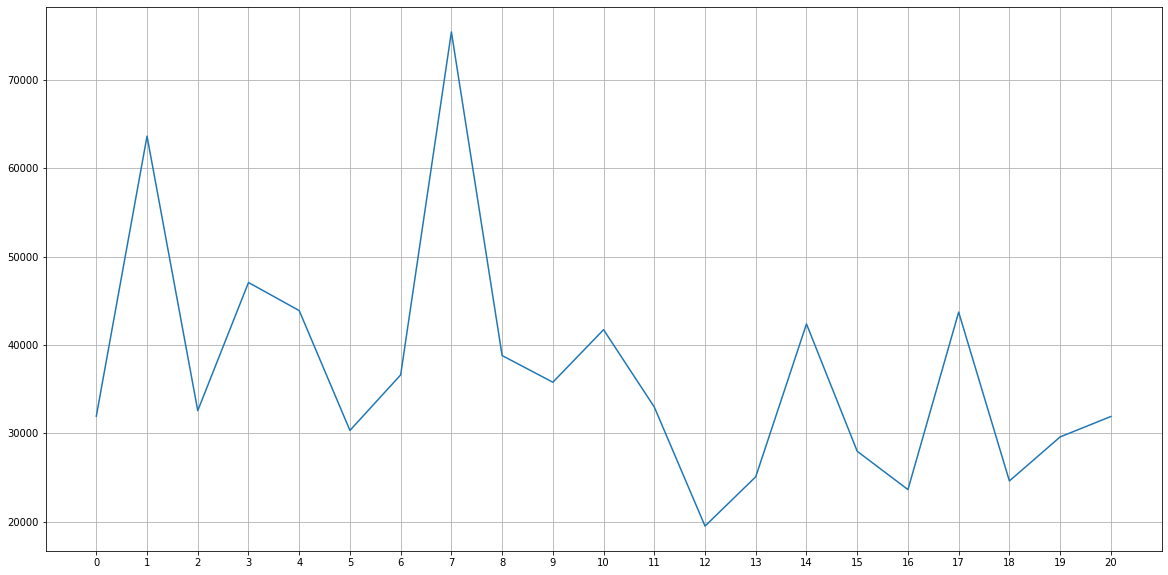

In [17]:
import scipy.integrate as integrate
energia_señal=[]

for i in range (21):
  señal = estaciones[i] #señal
  ts = len(señal)/128. #tiempo de muestreo
  time = np.linspace(0,ts,len(señal)) #tiemppo
  cuadrado=[]
  for i in range(0,len(señal)):
	  cuadrado.append(señal[i]*señal[i])
  energia = integrate.simps(cuadrado,time)#calculo la energia
  energia_señal.append(energia)

print('Energia:')
for i in range(21):
  print(str(i)+'- '+str(energia_señal[i])+' estacion: '+nom_estaciones[i])

plt.figure(figsize=(20,10))
plt.plot(energia_señal)
plt.xticks(np.arange(0, 21, step=1))
plt.grid()
plt.show()

* Estaciones más altas: 1, y 7.

* Estaciones más bajas: 12, 13, 16, 18 y 19.

# **Promedio**


Promedio:
0- 17.65310752197238 estacion: Girardota - S.O.S Aburra Norte
1- 26.907349807860598 estacion: Estacion Trafico Centro
2- 19.285983335235702 estacion: Medellin,  centro occidente - Universidad Nacional, sede El Volador
3- 23.314875584978886 estacion: Itagui - Casa de Justicia Itagui
4- 22.232146254232774 estacion: Caldas - Corporacion Universitaria Lasallista
5- 18.196015485294676 estacion: Itagui - I.E. Concejo Municipal de Itagui
6- 19.849451166153028 estacion: Medellin, El Poblado - Tanques La Ye EPM
7- 30.101144275767606 estacion: Estacion Trafico Sur
8- 21.133697523969868 estacion: Caldas - E U Joaquin Aristizabal
9- 20.36555948712095 estacion: La Estrella - Hospital
10- 22.007596670614085 estacion: Medellin, Altavista - I.E. Pedro Octavio Amado
11- 18.865226501160443 estacion: Medellin, Villahermosa - Planta de produccion de agua potable EPM
12- 13.449377772229198 estacion: Barbosa - Torre Social
13- 16.19121103622113 estacion: Copacabana - Ciudadela Educativa La Vida
14

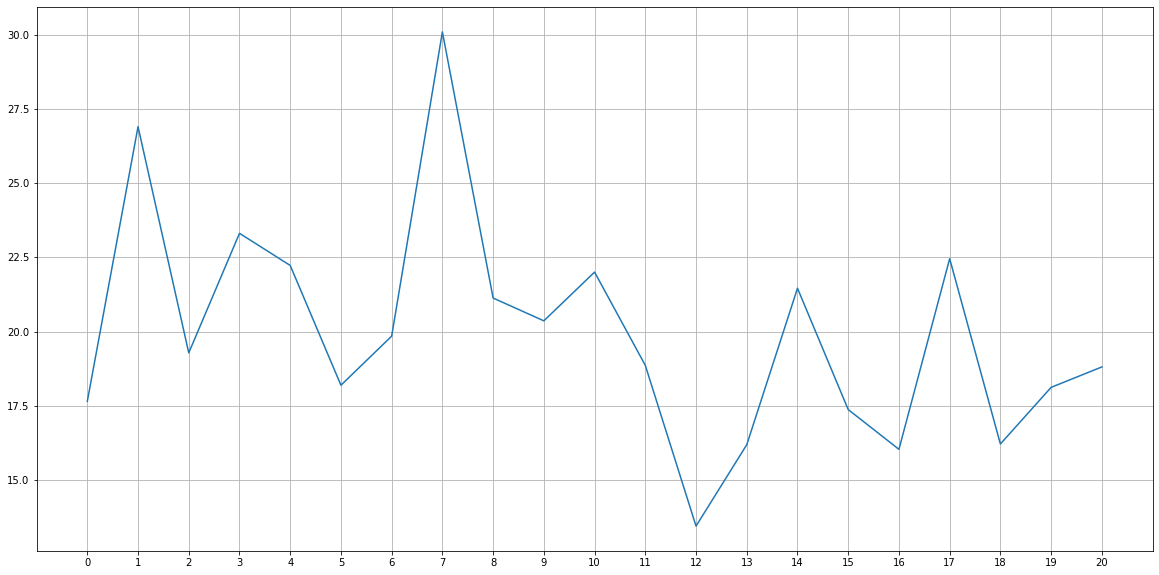

In [18]:
promedio_señal=[] #lista para guardar los promedios 

for i in range(21): #ciclo que recorre todos las estaciones
  señal = estaciones[i] 
  promedio_señal.append(np.mean(señal))# calculo del promedio de la señal

print('Promedio:')
for i in range(21):
  print(str(i)+'- '+str(promedio_señal[i])+' estacion: '+nom_estaciones[i])

plt.figure(figsize=(20,10))
plt.plot(promedio_señal)
plt.xticks(np.arange(0, 21, step=1))
plt.grid()
plt.show()

* Estaciones más altas: 1 y 7.

* Estaciones más bajas: 12, 16 y 18.

# **Desviacion estandar**

Desviacion estandar:
0- 12.469614278455124 estacion: Girardota - S.O.S Aburra Norte
1- 14.300650268826809 estacion: Estacion Trafico Centro
2- 10.22424793179448 estacion: Medellin,  centro occidente - Universidad Nacional, sede El Volador
3- 12.021307181712025 estacion: Itagui - Casa de Justicia Itagui
4- 12.177334738878015 estacion: Caldas - Corporacion Universitaria Lasallista
5- 10.542528481553235 estacion: Itagui - I.E. Concejo Municipal de Itagui
6- 11.909833535427184 estacion: Medellin, El Poblado - Tanques La Ye EPM
7- 14.12208989536446 estacion: Estacion Trafico Sur
8- 10.991552140039618 estacion: Caldas - E U Joaquin Aristizabal
9- 10.443205048810533 estacion: La Estrella - Hospital
10- 11.247624152100336 estacion: Medellin, Altavista - I.E. Pedro Octavio Amado
11- 11.238477751851956 estacion: Medellin, Villahermosa - Planta de produccion de agua potable EPM
12- 10.238809683924458 estacion: Barbosa - Torre Social
13- 10.183093672118098 estacion: Copacabana - Ciudadela Educativ

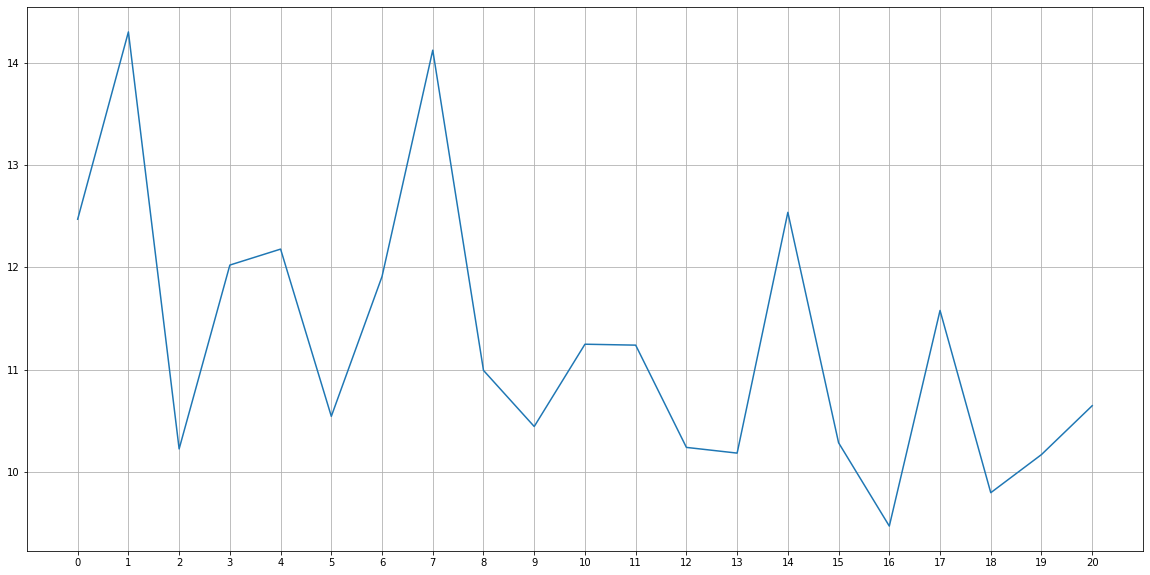

In [19]:
std_señal=[] #lista para guardar los promedios 

for i in range(21): #ciclo que recorre todos las estaciones
  señal = estaciones[i] 
  std_señal.append(np.std(señal))# calculo del promedio de la señal

print('Desviacion estandar:')
for i in range(21):
  print(str(i)+'- '+str(std_señal[i])+' estacion: '+nom_estaciones[i])

plt.figure(figsize=(20,10))
plt.plot(std_señal)
plt.xticks(np.arange(0, 21, step=1))
plt.grid()
plt.show()

* Estaciones más altas: 1, 2 y 7.

* Estaciones más bajas: 10, 12, 13, 16, 18 y 19.

# **Discusion:**

vemos que generalmente las más altas fueron siempre las estaciones 1 y 7 (Estacion Trafico Centro y Estacion Trafico Sur), lo cual tiene sentido ya que son zonas muy elevadas para el trafico, ademas de que estan muy centradas en la ciudad, tambien puede ser a que hay varias empresas y/o fabricas cercas las cuales liberan muchas de estas particulas contaminantes entre otras.

por otro lado las más bajas en general son 12, 13, 16, 18 y 19 (Barbosa - Torre Social, Copacabana - Ciudadela Educativa La Vida, Medellin, San Cristobal - Parque Biblioteca Fernando Boter, Bello - I.E. Fernando Velez y Envigado - E.S.E. Santa Gertrudis) que si observamos son las que suelen ser las zonas más rurales y menos congestionadas por empresas y por automoviles. 

# **SKTIME** 



In [20]:
#instalo SKTIME
!pip install sktime

In [21]:
#librerias necesarias para la prediccion


import numpy as np
import pandas as pd

from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.compose import (
    EnsembleForecaster,
    ReducedRegressionForecaster,
    TransformedTargetForecaster,
)
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.model_selection import (
    ForecastingGridSearchCV,
    SlidingWindowSplitter,
    temporal_train_test_split,
)
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
from sktime.transformations.series.detrend import Deseasonalizer, Detrender
from sktime.utils.plotting import plot_series



Vamos a realziar la predicion sobre un mes primero, para esto tomamos una esatcion en particular y la cortamos dejando 720 muestras, ya que se toma una muestra cada hora: 24*30=720 

como tenemos el tiempo incrementando en horas ponemos la frecuencia del Periodindex "H".

In [22]:
#hay que hacer las series o señales para cada una de las estaciones, para que haya congruencia con las fechas 

# extraemos los valores y las fechas 

Za=pd.Series(va[0:720],fa[0:720])
Za.index = pd.PeriodIndex(Za.index, freq="H", name="Period")

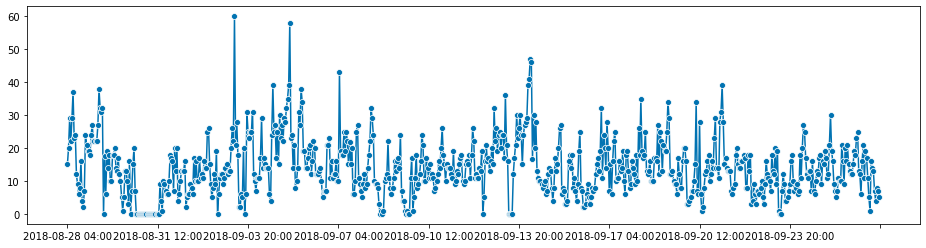

In [23]:
# graficamos el mes a predecir
plot_series(Za);

540 180


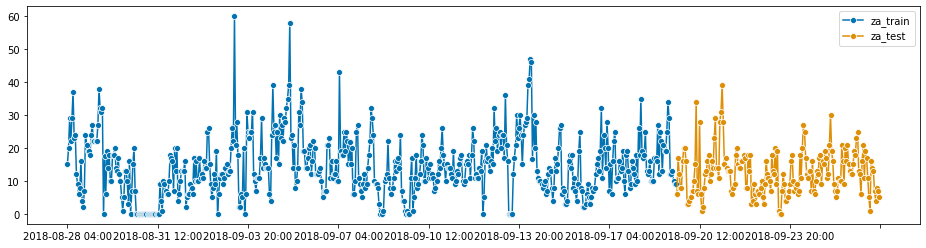

In [24]:
# usamos una cuarta parte de un mes de una estacion para poder realizar la prueba y las otras 3 partes para el entrenamiento

za_train, za_test = temporal_train_test_split(Za, test_size=180)
plot_series(za_train, za_test, labels=["za_train", "za_test"])
print(za_train.shape[0], za_test.shape[0])


In [25]:
# creamos el horizonte de pronostico 
fh = ForecastingHorizon(za_test.index, is_relative=False)
fh

ForecastingHorizon(['2018-09-19 16:00', '2018-09-19 17:00', '2018-09-19 18:00',
             '2018-09-19 19:00', '2018-09-19 20:00', '2018-09-19 21:00',
             '2018-09-19 22:00', '2018-09-19 23:00', '2018-09-20 00:00',
             '2018-09-20 01:00',
             ...
             '2018-09-26 18:00', '2018-09-26 19:00', '2018-09-26 20:00',
             '2018-09-26 21:00', '2018-09-26 22:00', '2018-09-26 23:00',
             '2018-09-27 00:00', '2018-09-27 01:00', '2018-09-27 02:00',
             '2018-09-27 03:00'],
            dtype='period[H]', name='Period', length=180, freq='H', is_relative=False)

### **Para cuantificar la calidad de la prediccion vamos a calcular el Smape**.

El error de porcentaje absoluto medio simétrico (SMAPE o sMAPE) es una medida de precisión basada en errores porcentuales (o relativos). Por lo general se define de la siguiente manera:

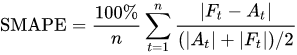

donde At es el valor real y Ft es el valor de previsión.

La diferencia absoluta entre At y Ft se divide por la mitad de la suma de los valores absolutos del valor real At y el valor de previsión Ft. El valor de este cálculo se suma para cada punto ajustado t y se divide de nuevo por el número de puntos ajustados n.

Python tiene la funcion implemntada con la libreria  Sktime

nosotros usaremos el metodo smape_loss el cual no dará el error de la prevision, a menor sea este numero mejor sera la prediccion


0.5088186580701144

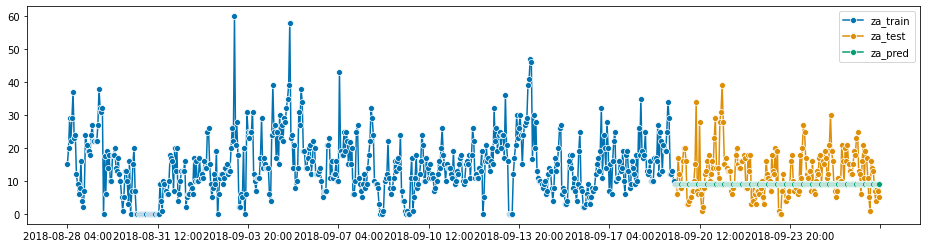

In [26]:
# usando sktime para predecir los siguientes 7 días

forecaster = NaiveForecaster(strategy="last") # primero creamos el modelo sin especificar la periocida estacional
forecaster.fit(za_train) #entrenamos el modelo
za_pred = forecaster.predict(fh) # predecimos 
plot_series(za_train, za_test, za_pred, labels=["za_train", "za_test", "za_pred"]) # graficamos
smape_loss(za_pred, za_test) # ca

* Vemos que sin ajustar el periodo estacional tenemos una predicion bastate mala, se aprecia grafiamnete que la prediccion es cercana al promedio y es un valor constante, cuantitativamente tenemos un smape de 0.5 lo cual si bien no es alto se debe a que matematicamte siempre se esta restando y dividiendo sobre el promedio absoluto.

0.48816088076652775

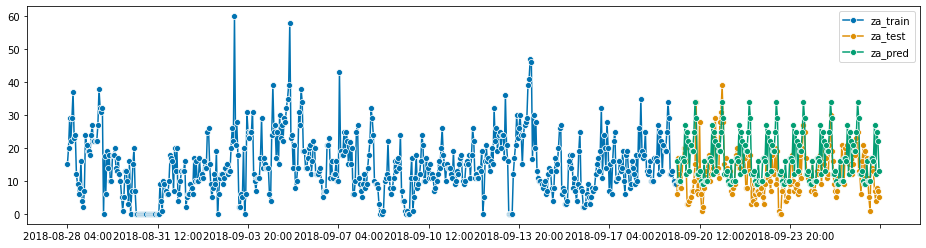

In [27]:
# ahora vamos a definir el periodo estacional que como sabemos gracias a la naturaleza propia de los datos es de 24
forecaster = NaiveForecaster(strategy="last", sp=24)
forecaster.fit(za_train)
za_pred = forecaster.predict(fh)
plot_series(za_train, za_test, za_pred, labels=["za_train", "za_test", "za_pred"])
smape_loss(za_pred, za_test)

* Vemos que la prediccion mejora bastante graficamente y como se puede apreciar tambien bajo el smape aunque no mucho.

## Acercamiento al uso de mapas 

In [ ]:
# Algunas librerias que he usado


!pip install geojson
!pip install geopandas
!pip install geojsonio


In [ ]:
import geojson
import geopandas as gpd
import geojsonio

In [ ]:
# Area_Met_01.geojson mapa del area metropolitana separada por municipios.

uploaded = files.upload()

states = gpd.read_file('Area_Met_01.geojson')
states.head()

In [ ]:
states.columns

In [ ]:
#geojsonio.display(states) # Requires authentication????

In [ ]:
states

In [ ]:
#states['STATION'] = X[]
X = pd.DataFrame(X)
X.columns =['Fecha', 'Q(Aire)', 'Sensor', 'latitud', 'longitud']
X1 = gpd.GeoDataFrame(X)
states['Sensor'] = [100,63,26,115,21,87,94,80,102,124]   # Esto para ejemplo evaluacion
states
X1

In [ ]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(figsize=(10, 10))
 
# Control del título y los ejes
ax.set_title('Área Metropolitana del Valle de Aburrá', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)

# Mostrar el mapa finalizado
#states.plot(column='Sensor', cmap='plasma', ax=ax, zorder=5)
states.plot(column='MPIO_CCDGO', cmap='plasma', ax=ax, # cmap='plasma'
              legend=True, cax=cax, zorder=5)

In [ ]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
 
# Control del encuadre (área geográfica) del mapa
#ax.axis([-12, 5, 32, 48])
 
# Control del título y los ejes
ax.set_title('Área Metropolitana del Valle de Aburrá', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
 
# Generar y cargar el mapa
states.plot(column='MPIO_CCDGO', cmap='summer', ax=ax, # cmap='plasma'
              legend=True, cax=cax, zorder=5)

In [ ]:
!pip install -U plotly

In [ ]:
import plotly.express as px
fig = px.line(states, x= 'MPIO_CNMBR', y = 'Sensor')
fig.show()